In [1]:
#!/usr/bin/env Rscript
#
##
### author: zhzhang
### e-mail: zhzhang2015@sina.com / zhenghua.zhang217@gmail.com
### data  : 2018.10.25
##
#
################################################################################

In [2]:
# Logging function
lg.info <- function(m, ln='INFO'){ 
    timeStamp <- strftime(Sys.time(), "%Y-%m-%d,%H:%M:%S")
    reporterName <- commandArgs()
    levelName <- ln
    message(timeStamp, ' <', reporterName[4], '> ', levelName, ': ', m)
}

lg.info('=== Start ===')

2018-11-02,08:49:46 <IRkernel::main()> INFO: === Start ===


In [3]:
# Loading necessay library
lg.info('Loading necessay library...')
library(ggplot2)
library(dplyr)
library(GGally)
library(dunn.test)
# library(gridExtra)
# library(grid)
library(ggpubr)
# library(boot)

2018-11-02,08:49:46 <IRkernel::main()> INFO: Loading necessay library...

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa

Loading required package: magrittr


In [4]:
# Arrange working dirs
lg.info('Arranging working dirs...')
hmDir <- '/home/umcg-zzhang'
pjDir <- paste0(hmDir, '/projects', '/ASEpredictor')
pjIpDir <- paste0(pjDir, '/inputs')
pjOpDir <- paste0(pjDir, '/outputs')
pjScDir <- paste0(pjDir, '/scripts')
pjMsDir <- paste0(pjDir, '/miscellanies')
pjTpDir <- paste0(pjDir, '/tmp')

2018-11-02,08:49:50 <IRkernel::main()> INFO: Arranging working dirs...


In [5]:
# Arrange input and output files
lg.info('Arranging input and ouput files...')

## Input files
pjIpFile <- paste0(pjOpDir, '/biosGavinOverlapCov10', '/biosGavinOverlapCov10AnnoFilteredByLog2FC.tsv')

## Output files
# pjOpFile = os.path.join( pjOpDir, 'biosGavinOverlapCov10AnnoFiltered.tsv')

df <- read.csv(pjIpFile, header=1, sep='\t')
df$chr <- as.factor(df$chr)

2018-11-02,08:49:52 <IRkernel::main()> INFO: Arranging input and ouput files...


In [6]:
# ANOVA test for log2FC < -1 and log2FC > 1, respectively
nLg2fcDf <- df[which(df$log2FC < 0), ]
pLg2fcDf <- df[which(df$log2FC > 0), ]

               Df Sum Sq Mean Sq F value Pr(>F)  
group           2     31   15.36   3.268 0.0381 *
Residuals   65491 307802    4.70                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log2FC ~ group, data = df)

$group
                             diff         lwr         upr     p adj
PATHOGENIC-BENIGN     -0.35902340 -0.72626008 0.008213276 0.0570110
POPULATION-BENIGN      0.06987498 -0.07673551 0.216485475 0.5035264
POPULATION-PATHOGENIC  0.42889839  0.03449804 0.823298740 0.0291205


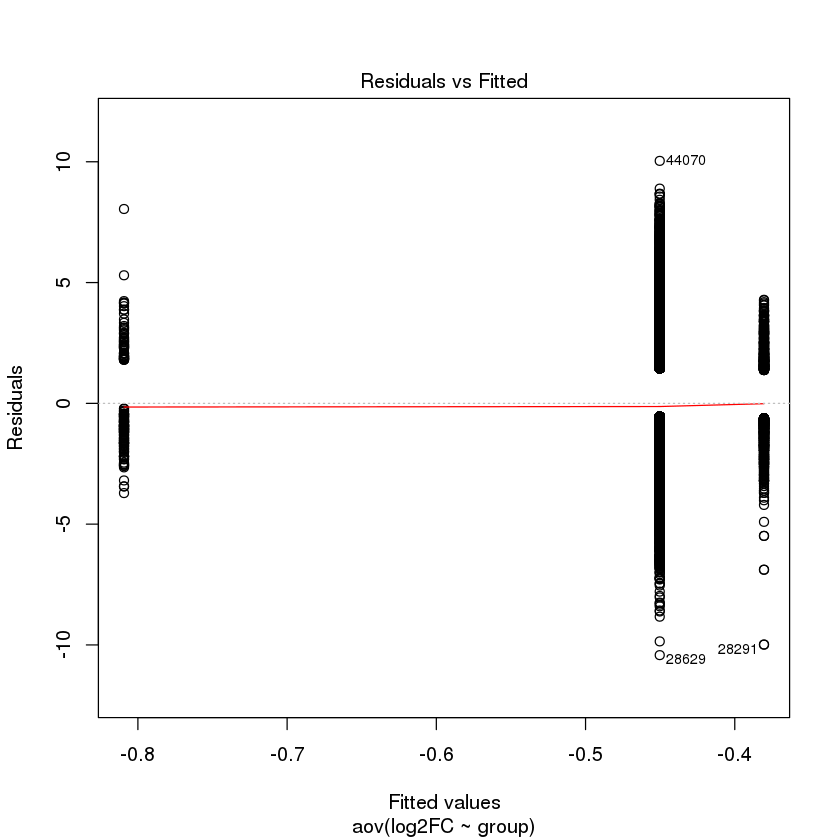

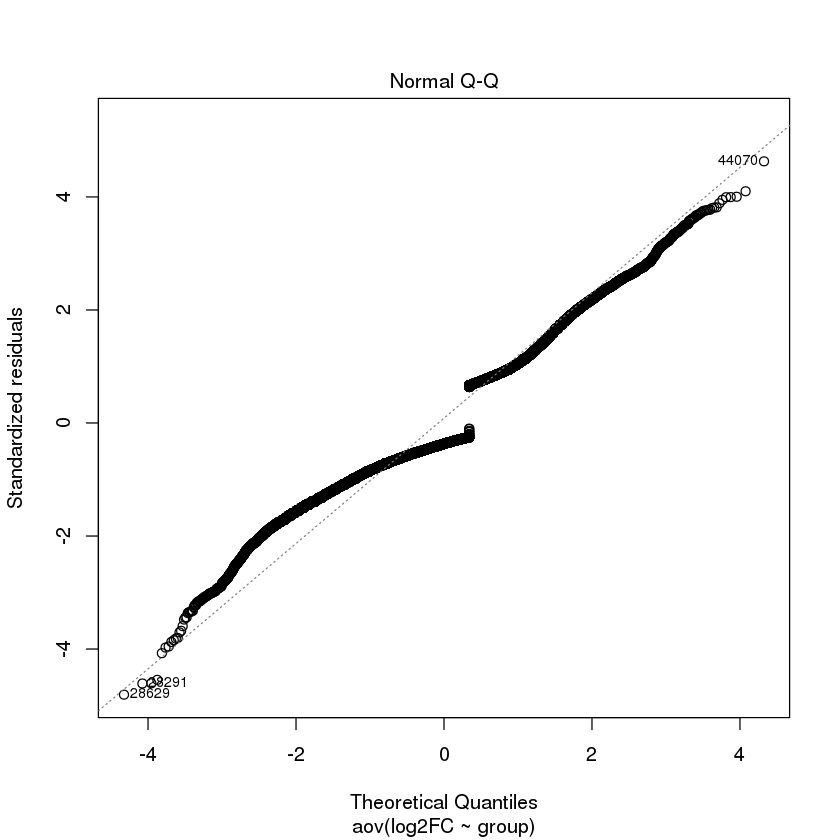

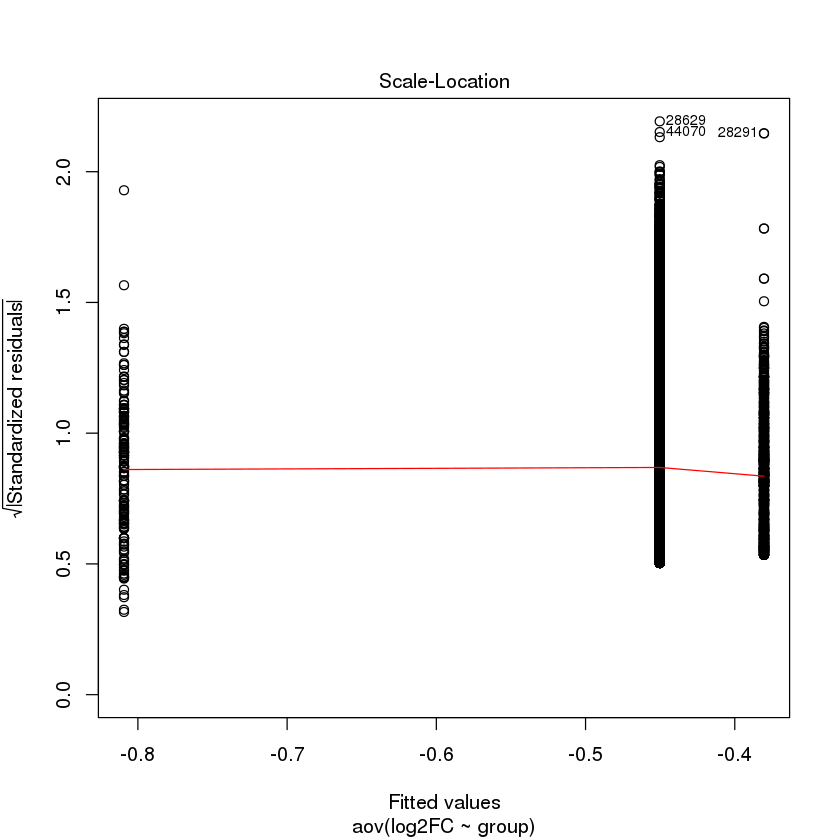

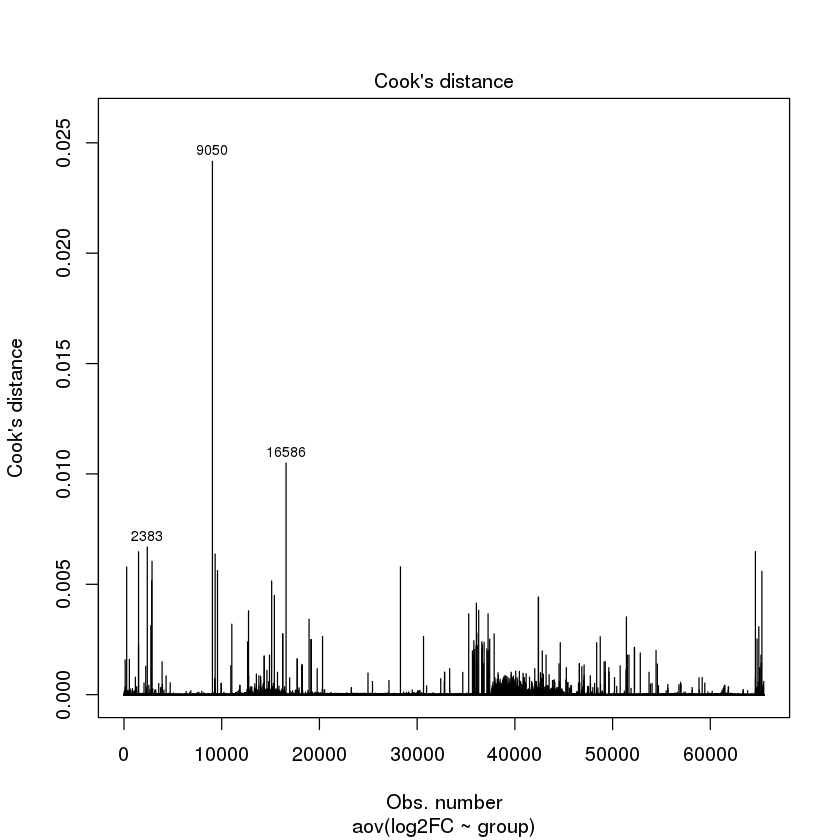

In [7]:
# One-way ANOVA test
allLg2fcAnova <- aov(log2FC ~ group, df) 
summary(allLg2fcAnova)
TukeyHSD(allLg2fcAnova)

plot(allLg2fcAnova, 1)
plot(allLg2fcAnova, 2)
plot(allLg2fcAnova, 3)
plot(allLg2fcAnova, 4)

               Df Sum Sq Mean Sq F value   Pr(>F)    
group           2    1.9  0.9574   33.98 1.79e-15 ***
Residuals   41492 1169.0  0.0282                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log10(abs(log2FC)) ~ group, data = nLg2fcDf)

$group
                             diff         lwr         upr     p adj
PATHOGENIC-BENIGN      0.05571780  0.02102715  0.09040845 0.0004901
POPULATION-BENIGN     -0.04539908 -0.05996239 -0.03083577 0.0000000
POPULATION-PATHOGENIC -0.10111688 -0.13863904 -0.06359472 0.0000000


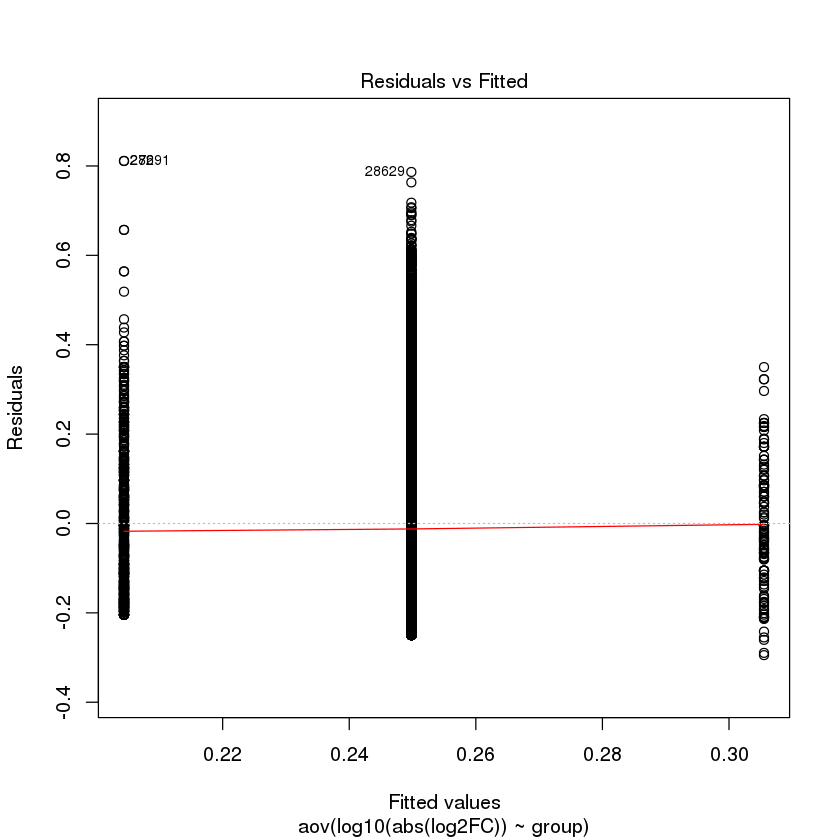

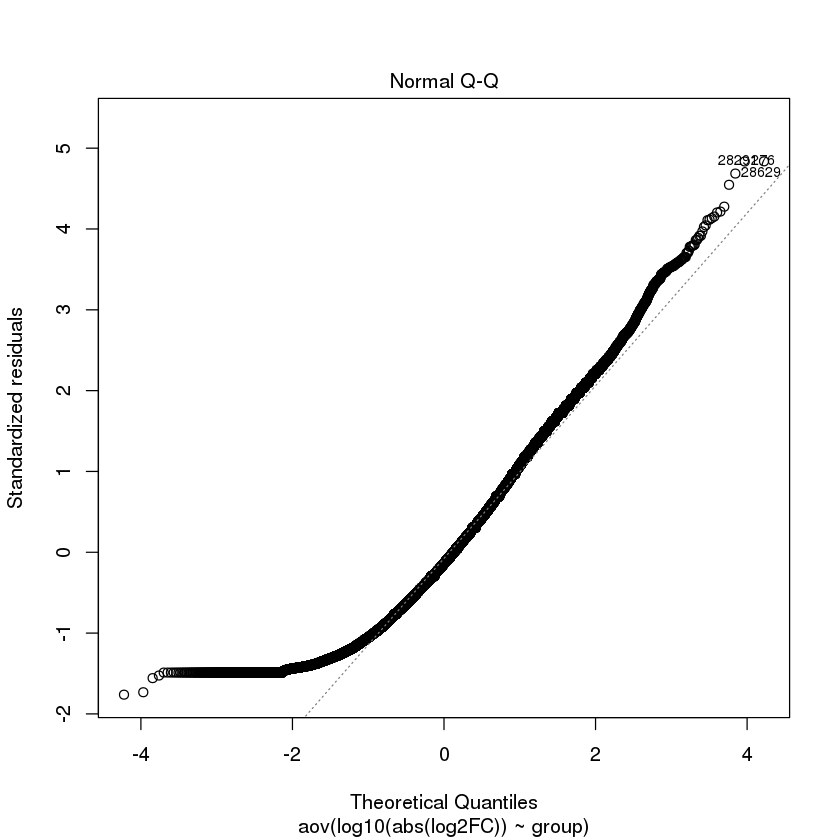

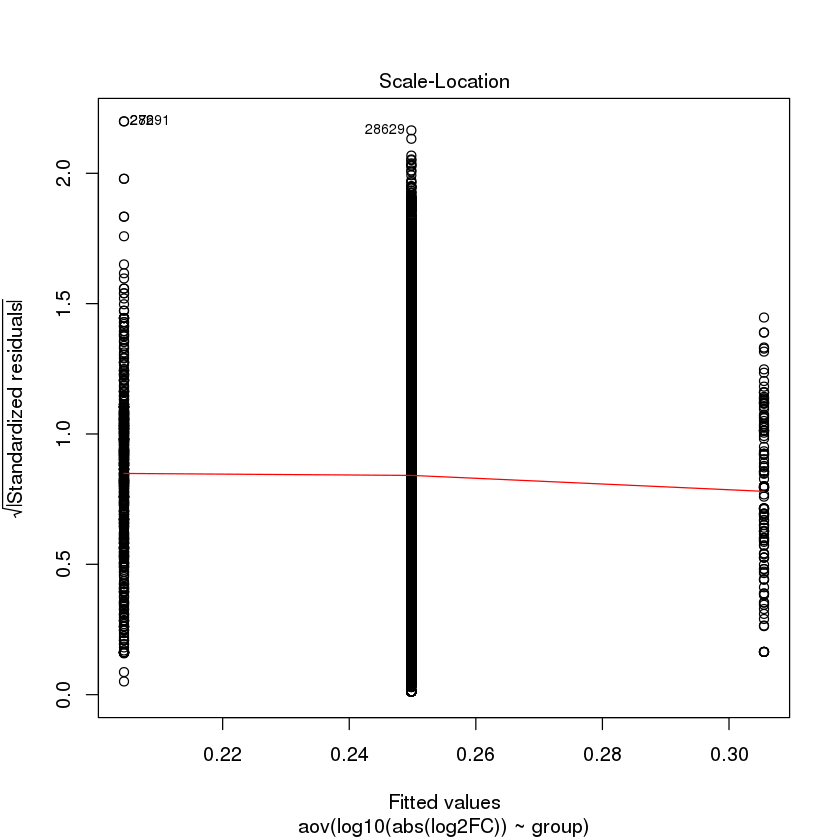

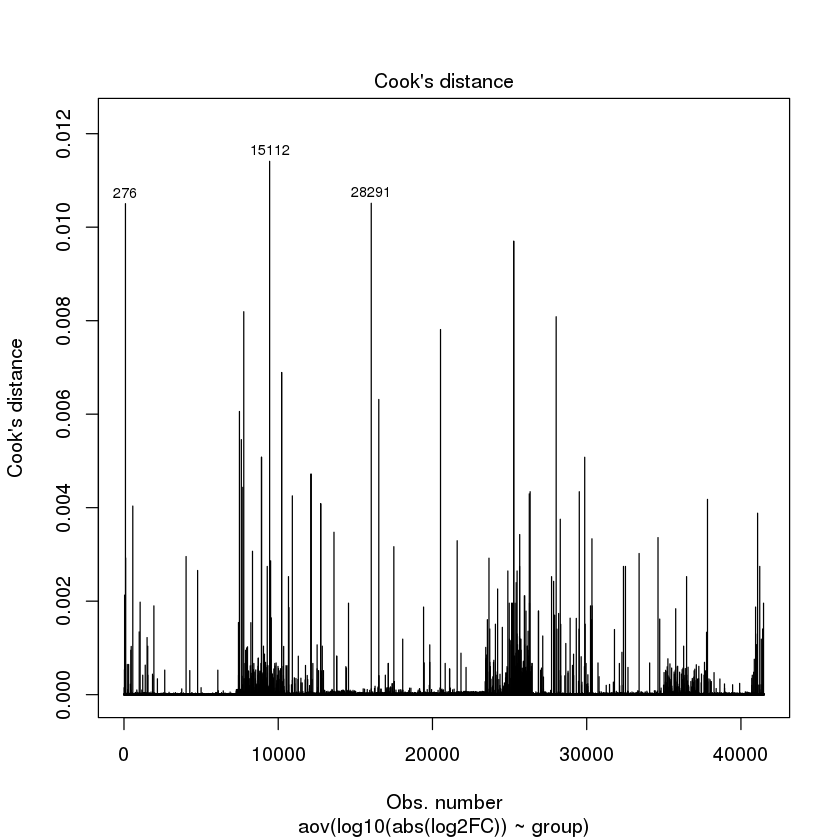

In [8]:
# ANOVA test for log2FC < -1
nLg2fcAnova <- aov(log10(abs(log2FC)) ~ group, nLg2fcDf)
summary(nLg2fcAnova)
TukeyHSD(nLg2fcAnova)

plot(nLg2fcAnova, 1)
plot(nLg2fcAnova, 2)
plot(nLg2fcAnova, 3)
plot(nLg2fcAnova, 4)

               Df Sum Sq Mean Sq F value   Pr(>F)    
group           2    1.9  0.9627   23.51 6.31e-11 ***
Residuals   23996  982.6  0.0409                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log10(log2FC) ~ group, data = pLg2fcDf)

$group
                             diff         lwr         upr     p adj
PATHOGENIC-BENIGN     -0.03821875 -0.09805510  0.02161760 0.2923256
POPULATION-BENIGN     -0.06247205 -0.08431888 -0.04062522 0.0000000
POPULATION-PATHOGENIC -0.02425330 -0.08780242  0.03929581 0.6437737


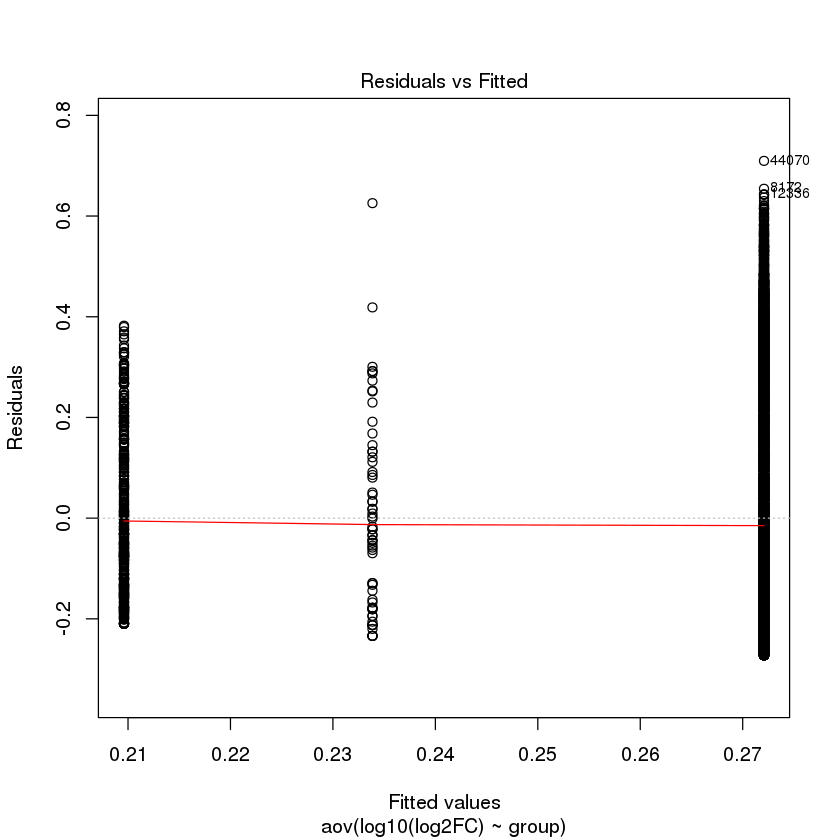

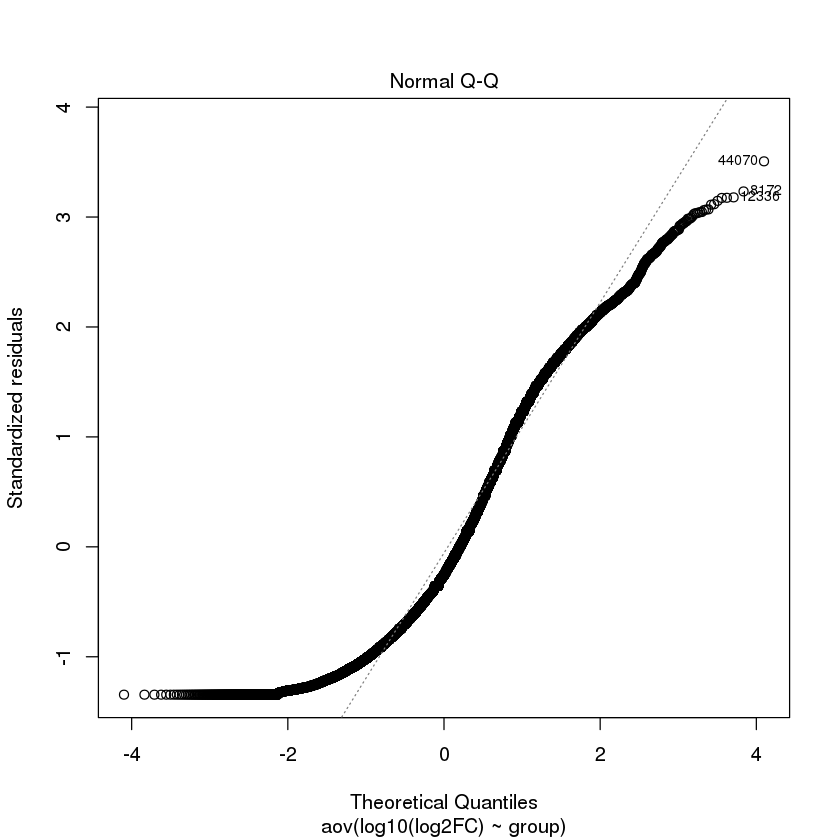

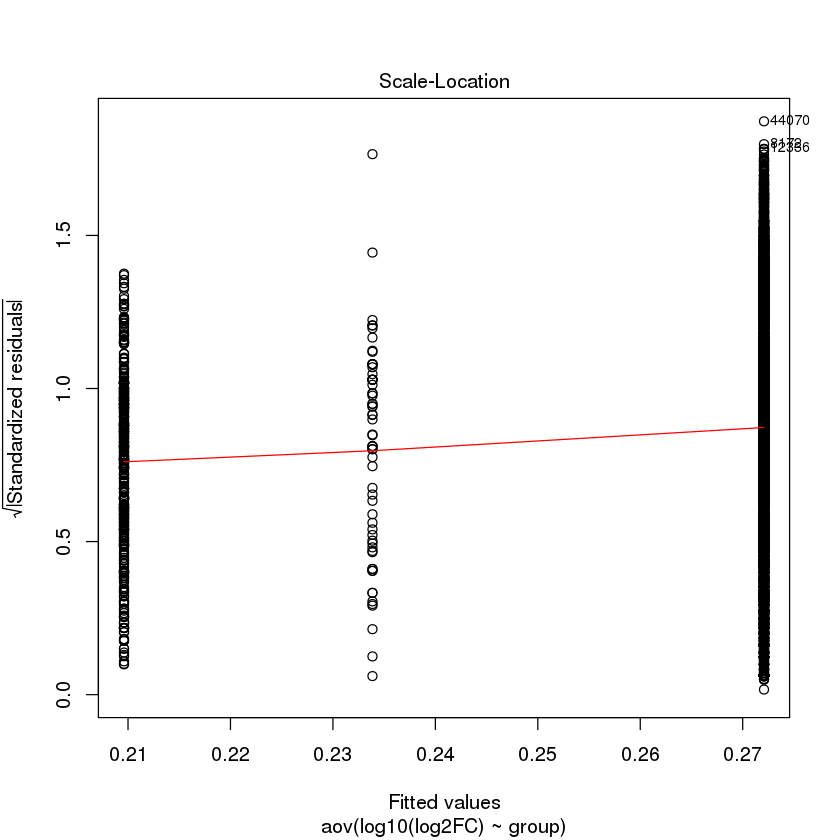

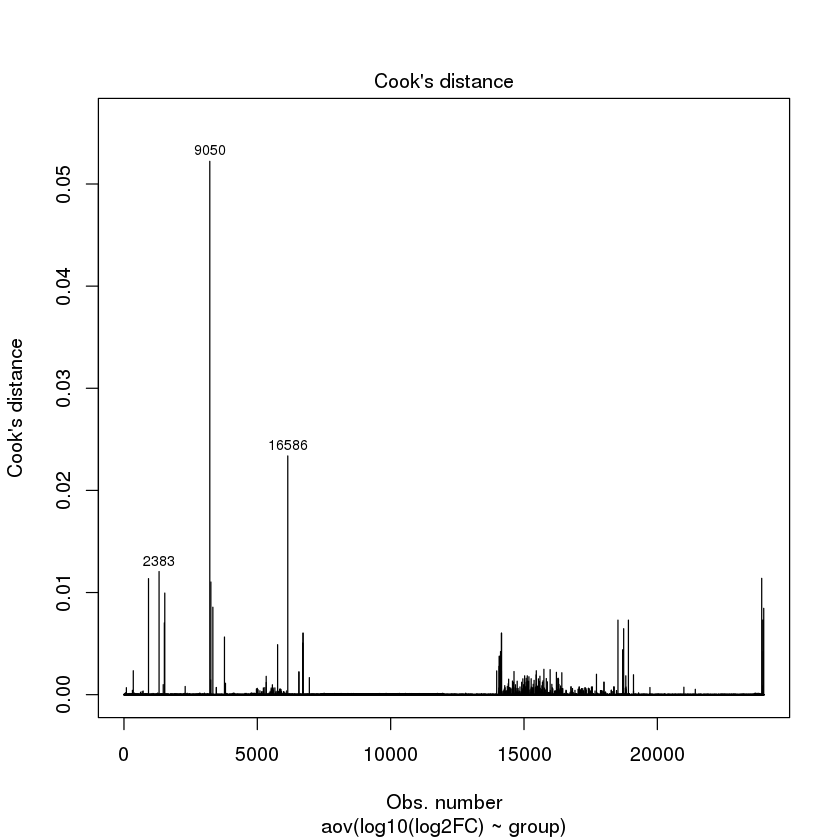

In [9]:
# ANOVA test for log2FC > 1
pLg2fcAnova <- aov(log10(log2FC) ~ group, pLg2fcDf)
summary(pLg2fcAnova)
TukeyHSD(pLg2fcAnova)

plot(pLg2fcAnova, 1)
plot(pLg2fcAnova, 2)
plot(pLg2fcAnova, 3)
plot(pLg2fcAnova, 4)


2018-11-02,09:29:33 <IRkernel::main()> INFO: ggpairs for log2FC < -1, including cadd, logwFC, and FDRPerVariant


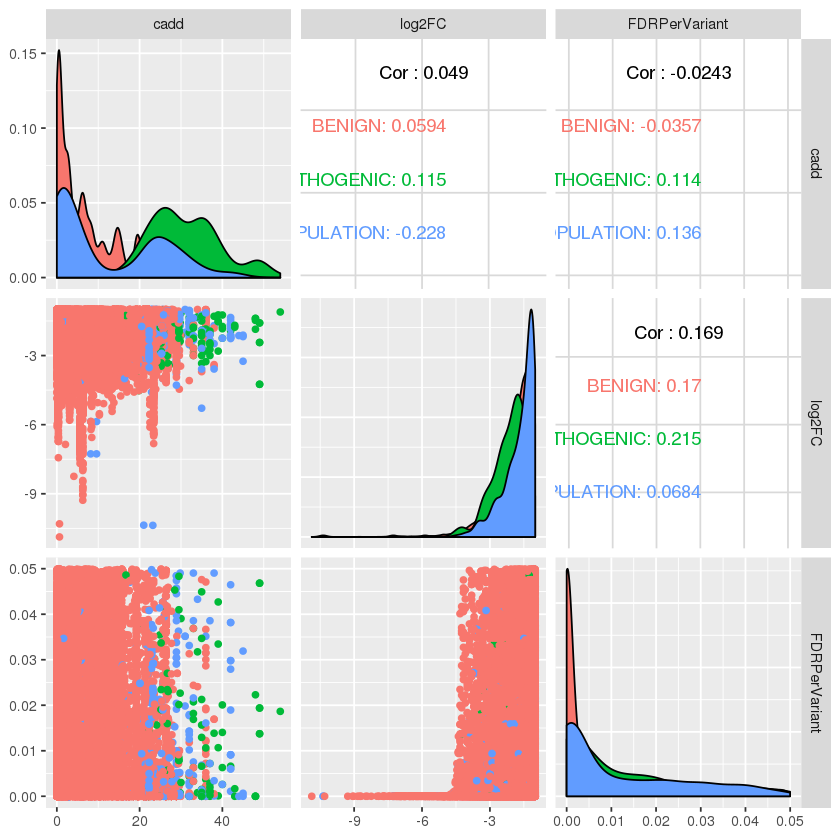

In [16]:
lg.info('ggpairs for log2FC < -1, including cadd, logwFC, and FDRPerVariant')
ggpairs(nLg2fcDf, aes(color=group), columns=c('cadd', 'log2FC', 'FDRPerVariant'))

2018-11-02,09:29:47 <IRkernel::main()> INFO: ggpairs for log2FC > 1, including cadd log2FC, and FDRPerVariant


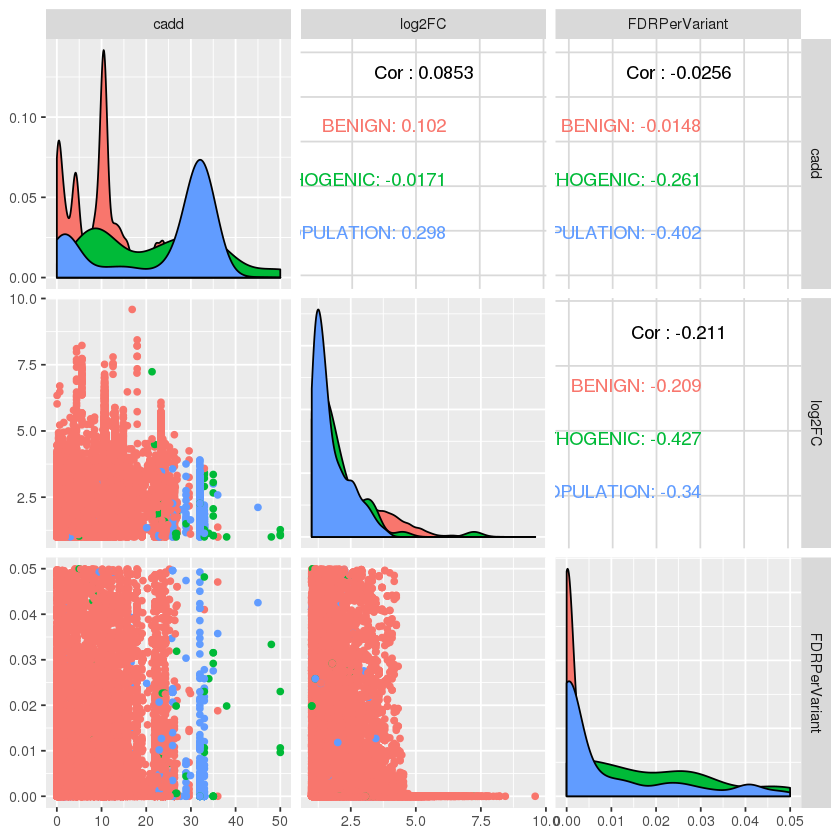

In [17]:
lg.info('ggpairs for log2FC > 1, including cadd log2FC, and FDRPerVariant')
ggpairs(pLg2fcDf, aes(color=group), columns=c('cadd', 'log2FC', 'FDRPerVariant'))

In [10]:
# Non-parametric 

lg.info('All')
dunn.test(df$log2FC, df$group, kw=TRUE)

lg.info('log2FC < -1')
kruskal.test(log2FC ~ group, data=nLg2fcDf)

lg.info('log2FC < 1')
kruskal.test(log2FC ~ group, data=pLg2fcDf)



2018-11-02,08:50:25 <IRkernel::main()> INFO: All


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 31.1572, df = 2, p-value = 0


                           Comparison of x by group                            
                                (No adjustment)                                
Col Mean-|
Row Mean |     BENIGN   PATHOGEN
---------+----------------------
PATHOGEN |   3.552759
         |    0.0002*
         |
POPULATI |  -4.278537  -4.898529
         |    0.0000*    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


2018-11-02,08:50:28 <IRkernel::main()> INFO: log2FC < -1



	Kruskal-Wallis rank sum test

data:  log2FC by group
Kruskal-Wallis chi-squared = 87.384, df = 2, p-value < 2.2e-16


2018-11-02,08:50:28 <IRkernel::main()> INFO: log2FC < 1



	Kruskal-Wallis rank sum test

data:  log2FC by group
Kruskal-Wallis chi-squared = 37.318, df = 2, p-value = 7.88e-09


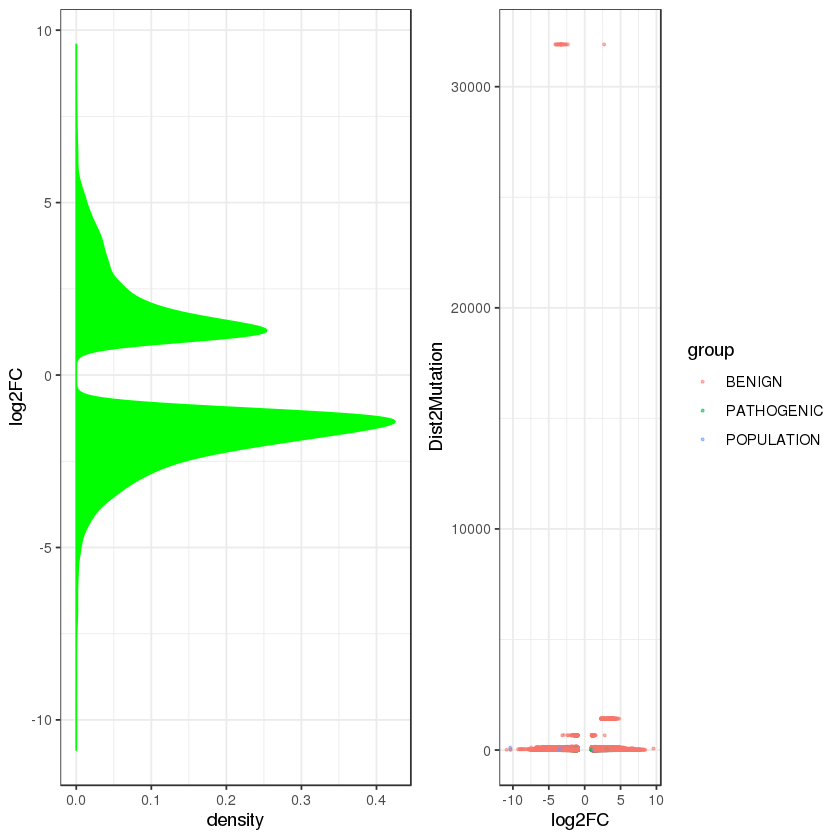

In [10]:
xDnst <- ggplot(data=df, aes(x=log2FC), alpha=0.5) + theme_bw() +
    geom_density(fill='green', color='green') +
    coord_flip()


p <- ggplot(data=df, aes(x=log2FC, y=Dist2Mutation, color=group)) + theme_bw()
p <- p + geom_point(size=0.5, alpha=0.5)

ggarrange(xDnst, p)

Warning message:
“Removed 6 rows containing missing values (geom_point).”

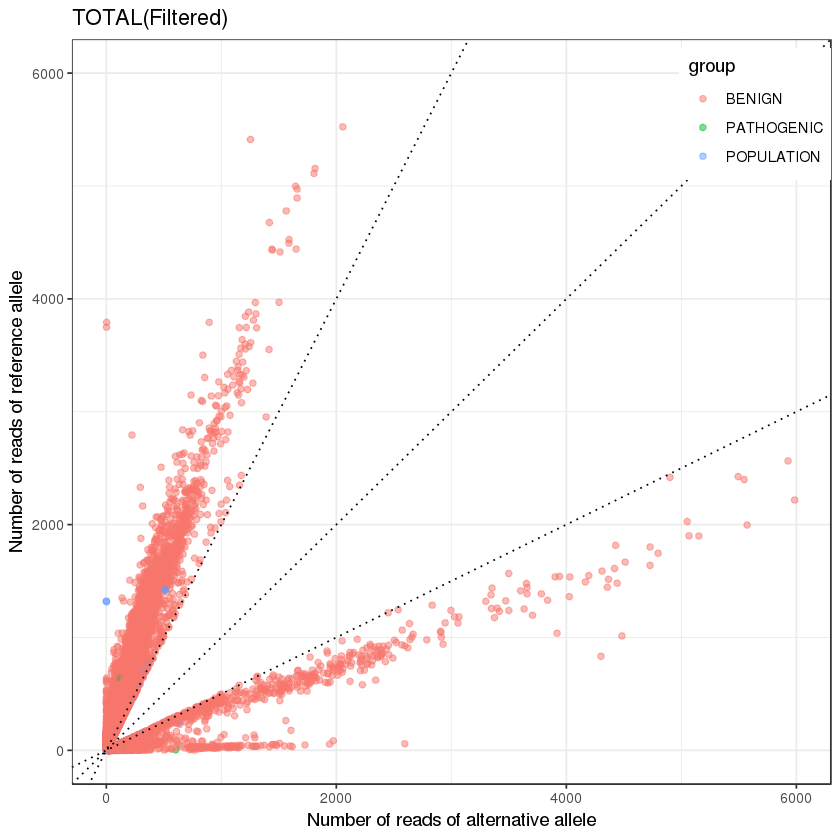

In [11]:
# Statistical analysis and plots + theme_bw()
p <- ggplot(data=df, aes(x=altCountsBios, y=refCountsBios, color=group)) + theme_bw()
p <- p + geom_point(alpha=0.5)
p <- p + geom_abline(slope=1, intercept=0, linetype='dotted')
p <- p + geom_abline(slope=0.5, intercept=0, linetype='dotted')
p <- p + geom_abline(slope=2, intercept=0, linetype='dotted')
p <- p + labs( title='TOTAL(Filtered)', y='Number of reads of reference allele', x='Number of reads of alternative allele')
p <- p + lims(x=c(1, 6000), y=c(1, 6000))
p <- p + theme(legend.position=c(0.9, 0.9))
p

Warning message:
“Removed 6 rows containing missing values (geom_point).”

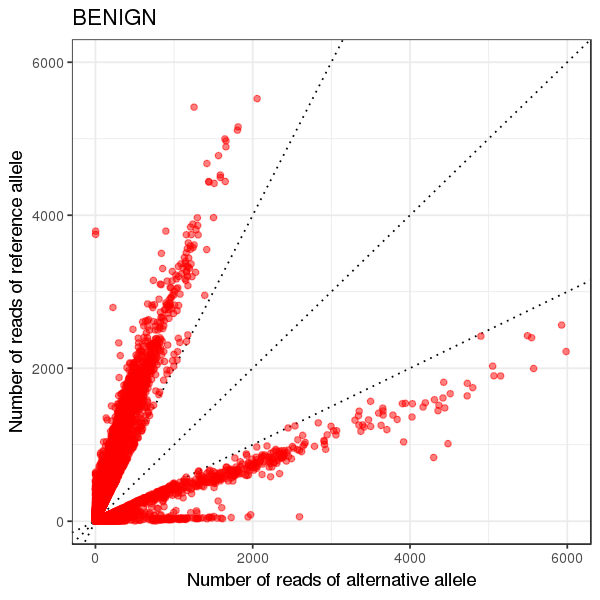

In [12]:
options(repr.plot.width=5, repr.plot.height=5)  # Change the size of the panel

p <- ggplot(data=df, aes(x=altCountsBios, y=refCountsBios)) + 
    theme_bw()

p <- p + geom_abline(slope=c(1, 0.5, 2), intercept=0, linetype='dotted')

p <- p + labs(
    y='Number of reads of reference allele', 
    x='Number of reads of alternative allele')

p1 <- p + 
    geom_point(
        data=df[which(df$group=='BENIGN'), ], 
        alpha=0.5, color='red') + 
    lims(x=c(1, 6000), y=c(1, 6000)) + 
    labs(title='BENIGN')
p1

# grid.arrange(p1, p2, p3, ncol=1)

In [24]:
names(df)

[1] "gene"              "chr"               "pos"              
  [4] "ref"               "alt"               "group"            
  [7] "effect"            "impact"            "cadd"             
 [10] "CaddChrom"         "CaddPos"           "CaddRef"          
 [13] "CaddAlt"           "Type"              "Length"           
 [16] "AnnoType"          "Consequence"       "ConsScore"        
 [19] "ConsDetail"        "GC"                "CpG"              
 [22] "motifECount"       "motifEName"        "motifEHIPos"      
 [25] "motifEScoreChng"   "oAA"               "nAA"              
 [28] "GeneID"            "FeatureID"         "GeneName"         
 [31] "CCDS"              "Intron"            "Exon"             
 [34] "cDNApos"           "relcDNApos"        "CDSpos"           
 [37] "relCDSpos"         "protPos"           "relProtPos"       
 [40] "Domain"            "Dst2Splice"        "Dst2SplType"      
 [43] "minDistTSS"        "minDistTSE"        "SIFTcat"          
 [46] "SIFTval"           "PolyPhenCat"       "PolyPhenVal"      
 [49] "priPhCons"         "mamPhCons"         "verPhCons"        
 [52] "priPhyloP"         "mamPhyloP"         "verPhyloP"        
 [55] "bStatistic"        "targetScan"        "mirSVR.Score"     
 [58] "mirSVR.E"          "mirSVR.Aln"        "cHmmTssA"         
 [61] "cHmmTssAFlnk"      "cHmmTxFlnk"        "cHmmTx"           
 [64] "cHmmTxWk"          "cHmmEnhG"          "cHmmEnh"          
 [67] "cHmmZnfRpts"       "cHmmHet"           "cHmmTssBiv"       
 [70] "cHmmBivFlnk"       "cHmmEnhBiv"        "cHmmReprPC"       
 [73] "cHmmReprPCWk"      "cHmmQuies"         "GerpRS"           
 [76] "GerpRSpval"        "GerpN"             "GerpS"            
 [79] "TFBS"              "TFBSPeaks"         "TFBSPeaksMax"     
 [82] "tOverlapMotifs"    "motifDist"         "Segway"           
 [85] "EncH3K27Ac"        "EncH3K4Me1"        "EncH3K4Me3"       
 [88] "EncExp"            "EncNucleo"         "EncOCC"           
 [91] "EncOCCombPVal"     "EncOCDNasePVal"    "EncOCFairePVal"   
 [94] "EncOCpolIIPVal"    "EncOCctcfPVal"     "EncOCmycPVal"     
 [97] "EncOCDNaseSig"     "EncOCFaireSig"     "EncOCpolIISig"    
[100] "EncOCctcfSig"      "EncOCmycSig"       "Grantham"         
[103] "Dist2Mutation"     "Freq100bp"         "Rare100bp"        
[106] "Sngl100bp"         "Freq1000bp"        "Rare1000bp"       
[109] "Sngl1000bp"        "Freq10000bp"       "Rare10000bp"      
[112] "Sngl10000bp"       "dbscSNV.ada_score" "dbscSNV.rf_score" 
[115] "RawScore"          "PHRED"             "gnomad_AF"        
[118] "chrBios"           "posBios"           "refAlleleBios"    
[121] "altAlleleBios"     "refCountsBios"     "altCountsBios"    
[124] "sampleBios"        "pVal"              "FDROverall"       
[127] "FDRPerVariant"     "varInsideChi2Pval" "log2FC"

In [25]:
sapply(df, class)

gene               chr               pos               ref 
         "factor"          "factor"         "integer"          "factor" 
              alt             group            effect            impact 
         "factor"          "factor"          "factor"          "factor" 
             cadd         CaddChrom           CaddPos           CaddRef 
        "numeric"         "integer"         "integer"          "factor" 
          CaddAlt              Type            Length          AnnoType 
         "factor"          "factor"         "integer"          "factor" 
      Consequence         ConsScore        ConsDetail                GC 
         "factor"         "integer"          "factor"         "numeric" 
              CpG       motifECount        motifEName       motifEHIPos 
        "numeric"         "numeric"          "factor"         "numeric" 
  motifEScoreChng               oAA               nAA            GeneID 
        "numeric"          "factor"          "factor"          "factor" 
        FeatureID          GeneName              CCDS            Intron 
         "factor"          "factor"          "factor"          "factor" 
             Exon           cDNApos        relcDNApos            CDSpos 
         "factor"         "numeric"         "numeric"         "numeric" 
        relCDSpos           protPos        relProtPos            Domain 
        "numeric"         "numeric"         "numeric"          "factor" 
       Dst2Splice       Dst2SplType        minDistTSS        minDistTSE 
        "numeric"          "factor"         "integer"         "integer" 
          SIFTcat           SIFTval       PolyPhenCat       PolyPhenVal 
         "factor"         "numeric"          "factor"         "numeric" 
        priPhCons         mamPhCons         verPhCons         priPhyloP 
        "numeric"         "numeric"         "numeric"         "numeric" 
        mamPhyloP         verPhyloP        bStatistic        targetScan 
        "numeric"         "numeric"         "numeric"         "numeric" 
     mirSVR.Score          mirSVR.E        mirSVR.Aln          cHmmTssA 
        "numeric"         "numeric"         "numeric"         "numeric" 
     cHmmTssAFlnk        cHmmTxFlnk            cHmmTx          cHmmTxWk 
        "numeric"         "numeric"         "numeric"         "numeric" 
         cHmmEnhG           cHmmEnh       cHmmZnfRpts           cHmmHet 
        "numeric"         "numeric"         "numeric"         "numeric" 
       cHmmTssBiv       cHmmBivFlnk        cHmmEnhBiv        cHmmReprPC 
        "numeric"         "numeric"         "numeric"         "numeric" 
     cHmmReprPCWk         cHmmQuies            GerpRS        GerpRSpval 
        "numeric"         "numeric"         "numeric"         "numeric" 
            GerpN             GerpS              TFBS         TFBSPeaks 
        "numeric"         "numeric"         "numeric"         "numeric" 
     TFBSPeaksMax    tOverlapMotifs         motifDist            Segway 
        "numeric"         "numeric"         "numeric"          "factor" 
       EncH3K27Ac        EncH3K4Me1        EncH3K4Me3            EncExp 
        "numeric"         "numeric"         "numeric"         "numeric" 
        EncNucleo            EncOCC     EncOCCombPVal    EncOCDNasePVal 
        "numeric"         "numeric"         "numeric"         "numeric" 
   EncOCFairePVal    EncOCpolIIPVal     EncOCctcfPVal      EncOCmycPVal 
        "numeric"         "numeric"         "numeric"         "numeric" 
    EncOCDNaseSig     EncOCFaireSig     EncOCpolIISig      EncOCctcfSig 
        "numeric"         "numeric"         "numeric"         "numeric" 
      EncOCmycSig          Grantham     Dist2Mutation         Freq100bp 
        "numeric"         "numeric"         "integer"         "numeric" 
        Rare100bp         Sngl100bp        Freq1000bp        Rare1000bp 
        "numeric"         "numeric"         "numeric"         "numeric" 
       Sngl1000bp       Freq10000bp       Rare10000bp       Sngl10000bp

In [26]:
df[1:6, ]

gene,chr,pos,ref,alt,group,effect,impact,cadd,CaddChrom,⋯,refAlleleBios,altAlleleBios,refCountsBios,altCountsBios,sampleBios,pVal,FDROverall,FDRPerVariant,varInsideChi2Pval,log2FC
VCL,10,75879781,A,C,BENIGN,3_prime_UTR_variant,MODIFIER,12.590,10,⋯,A,C,58,17,AC1C40ACXX-6-15_BC52YAACXX-7-15_BD2D5MACXX-6-15,2.182328e-06,0.0001838477,3.153464e-04,2.053468e-30,-1.770518
VCL,10,75879781,A,C,BENIGN,3_prime_UTR_variant,MODIFIER,12.590,10,⋯,A,C,32,12,AC1C40ACXX-8-18_BD2D5MACXX-7-18,3.657767e-03,0.0925987318,3.070968e-02,2.053468e-30,-1.415037
GLUD1,10,88820789,T,C,BENIGN,synonymous_variant,LOW,11.040,10,⋯,T,C,2,24,AC1C40ACXX-8-18_BD2D5MACXX-7-18,1.049042e-05,0.0007571983,5.667739e-05,9.999999e-01,3.584963
GLUD1,10,88820789,T,C,BENIGN,synonymous_variant,LOW,11.040,10,⋯,T,C,3,13,AC1JL5ACXX-1-13,2.127075e-02,0.2799239858,2.415440e-02,9.999999e-01,2.115477
HPS1,10,100195130,G,A,BENIGN,synonymous_variant,LOW,0.053,10,⋯,G,A,26,58,AC1JL5ACXX-1-8,6.279473e-04,0.0243940787,3.935136e-02,5.017081e-31,1.157541
GLUD1,10,88820789,T,C,BENIGN,synonymous_variant,LOW,11.040,10,⋯,T,C,1,14,AC1JL5ACXX-1-9,9.765625e-04,0.0343465151,1.658877e-03,9.999999e-01,3.807355


In [28]:
?ggarrange

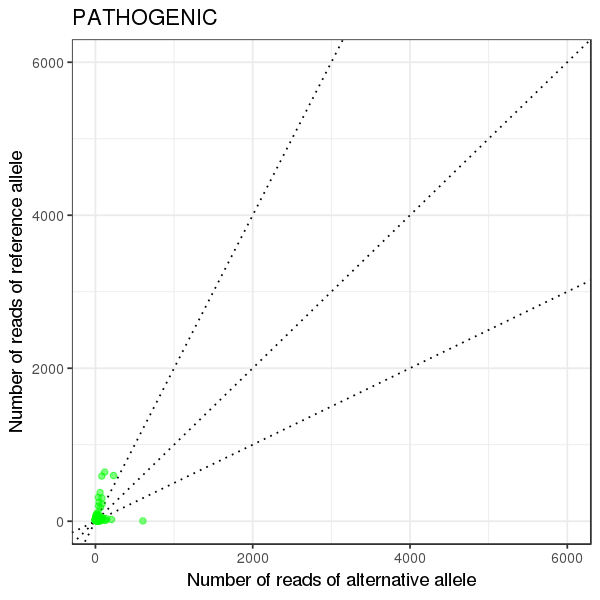

In [13]:
p2 <- p + 
    geom_point(
        data=df[which(df$group=='PATHOGENIC'), ], 
        alpha=0.5, color='green') + 
    lims(x=c(1, 6000), y=c(1, 6000)) + 
    labs(title='PATHOGENIC')
p2

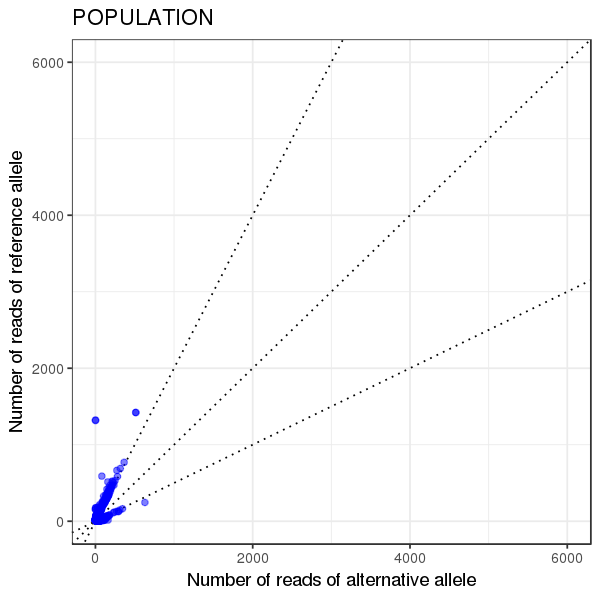

In [56]:
p3 <- p +
    geom_point(
        data=df[which(df$group=='POPULATION'), ], 
        alpha=0.5, color='blue') + 
    lims(x=c(1, 6000), y=c(1, 6000)) + 
    labs(title='POPULATION')
p3

Warning message:
“Using alpha for a discrete variable is not advised.”

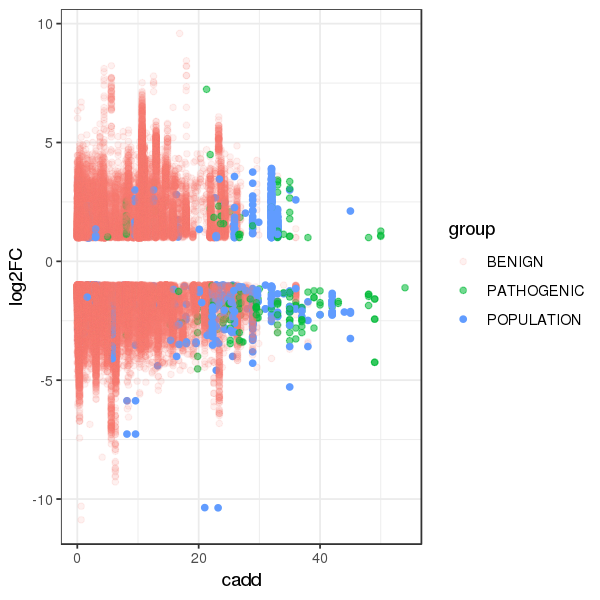

In [31]:
p <- ggplot(data=df, aes(x=cadd, y=log2FC, color=group)) + theme_bw()
p <- p + geom_point(aes(alpha=group))
p

Warning message:
“Using alpha for a discrete variable is not advised.”

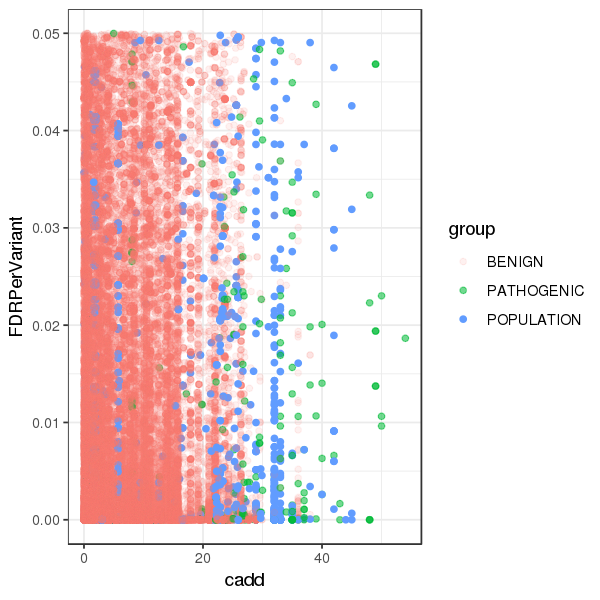

In [32]:
p <- ggplot(data=df, aes(x=cadd, y=FDRPerVariant, color=group)) + theme_bw()
p <- p + geom_point(aes(alpha=group))
p

Warning message:
“Using alpha for a discrete variable is not advised.”

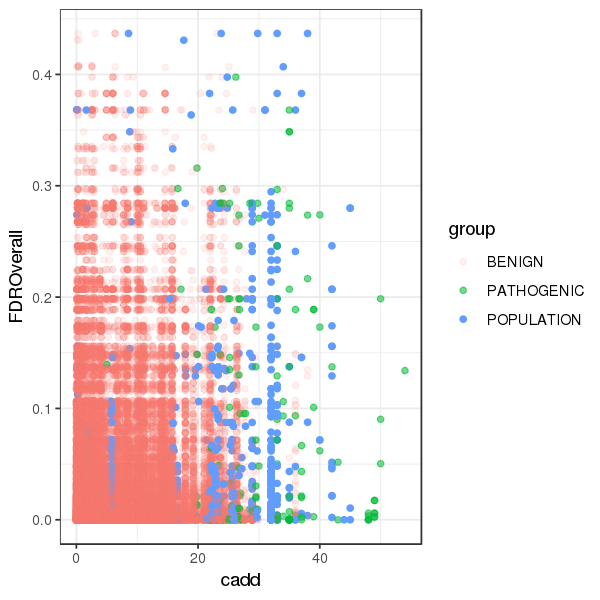

In [33]:
p <- ggplot(data=df, aes(x=cadd, y=FDROverall, color=group)) + theme_bw()
p <- p + geom_point(aes(alpha=group))
p

Warning message:
“Using alpha for a discrete variable is not advised.”

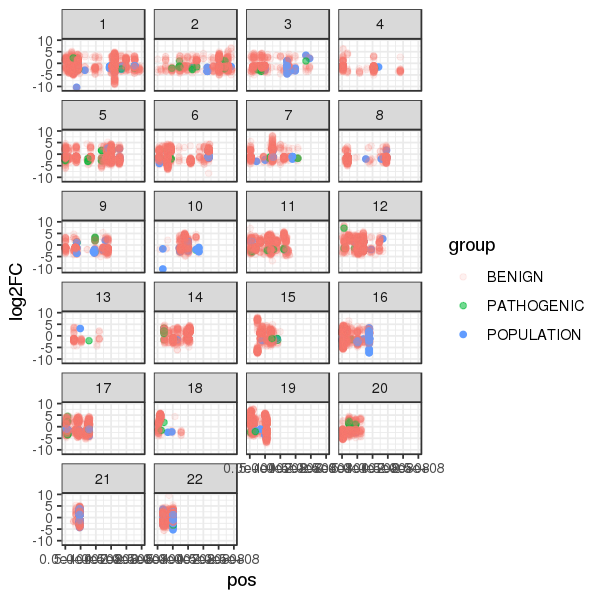

In [34]:
p <- ggplot(data=df, aes(x=pos, y=log2FC, color=group)) + theme_bw()
p <- p + geom_point(aes(alpha=group))
p <- p + facet_wrap(.~chr, ncol=4)
p

In [35]:
dfFDROa0.05 <- df[which(df$FDROverall <= 0.05), ]

Warning message:
“Using alpha for a discrete variable is not advised.”Warning message:
“Removed 6 rows containing missing values (geom_point).”

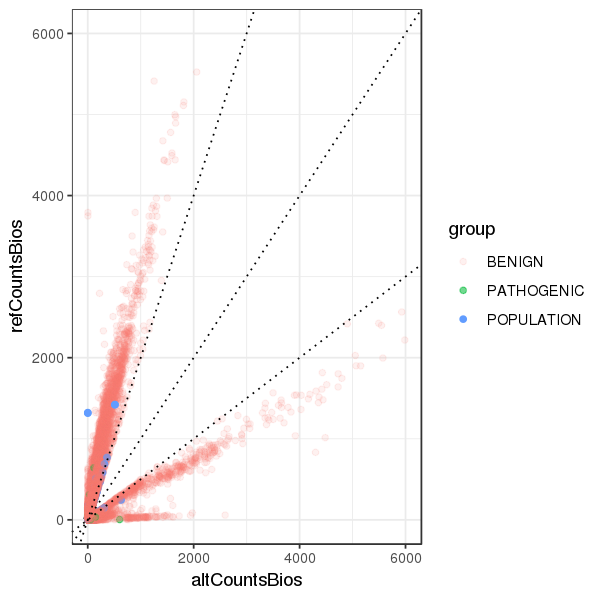

In [36]:
p <- ggplot(data=dfFDROa0.05, aes(x=altCountsBios, y=refCountsBios, color=group))
p <- p + theme_bw()
p <- p + geom_point(aes(alpha=group))
p <- p + lims(x=c(1, 6000), y=c(1, 6000))
p <- p + geom_abline(slope=1, intercept=0, linetype='dotted')
p <- p + geom_abline(slope=0.5, intercept=0, linetype='dotted')
p <- p + geom_abline(slope=2, intercept=0, linetype='dotted')
p

In [37]:
dfShort <- df[,c('gene', 'chr', 'pos', 'ref', 'alt', 'group', 'cadd', 'refCountsBios', 
                 'altCountsBios', 'FDRPerVariant', 'varInsideChi2Pval', 'log2FC') ]

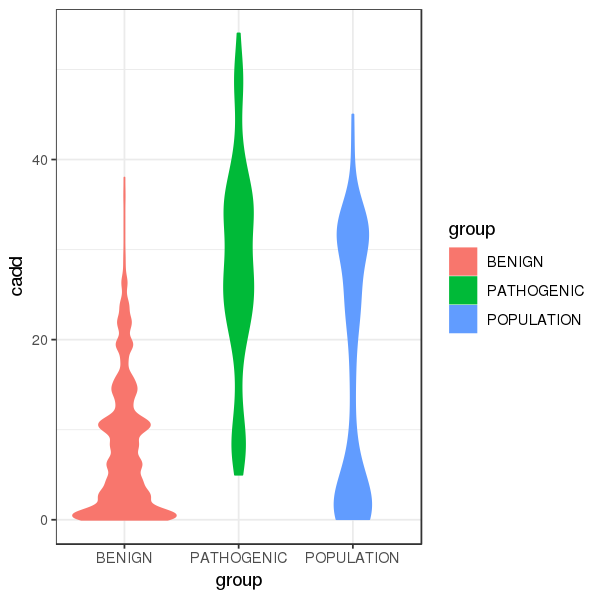

In [38]:
bxPlt <- ggplot(data=dfShort, aes(x=group, y=cadd)) + theme_bw()
bxPlt <- bxPlt + geom_violin(aes(color=group, fill=group))
bxPlt

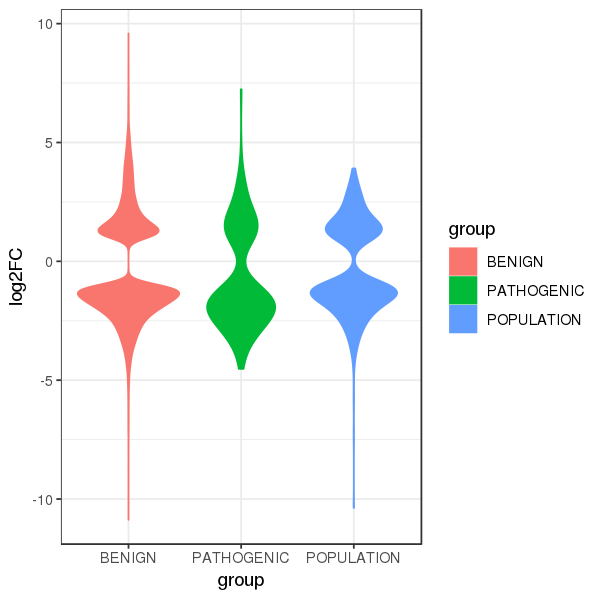

In [39]:
bxPlt <- ggplot(data=dfShort, aes(x=group, y=log2FC)) + theme_bw()
bxPlt <- bxPlt + geom_violin(aes(color=group, fill=group))
bxPlt

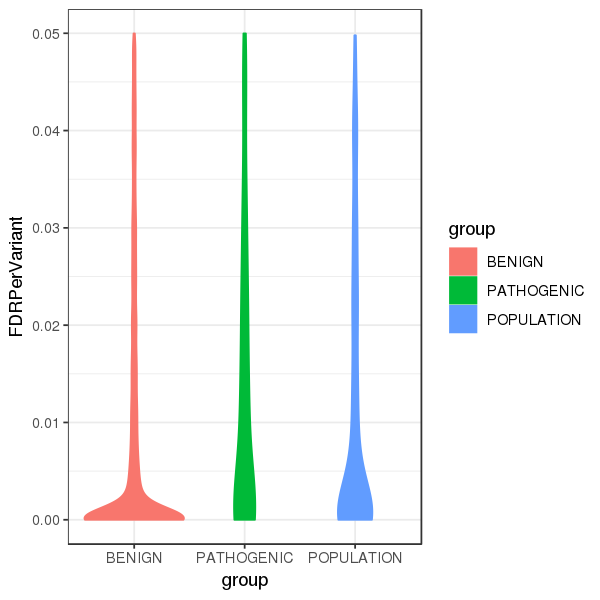

In [40]:
bxPlt <- ggplot(data=dfShort, aes(x=group, y=FDRPerVariant)) + theme_bw()
bxPlt <- bxPlt + geom_violin(aes(color=group, fill=group))
bxPlt

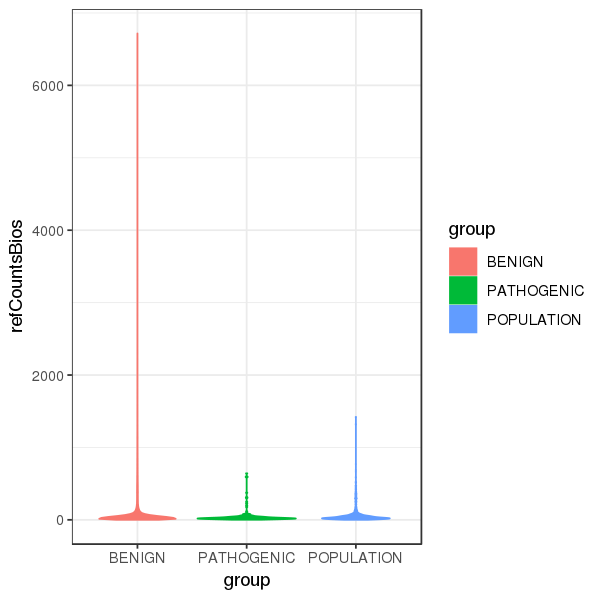

In [41]:
bxPlt <- ggplot(data=dfShort, aes(x=group, y=refCountsBios)) + theme_bw()
bxPlt <- bxPlt + geom_violin(aes(color=group, fill=group))
bxPlt

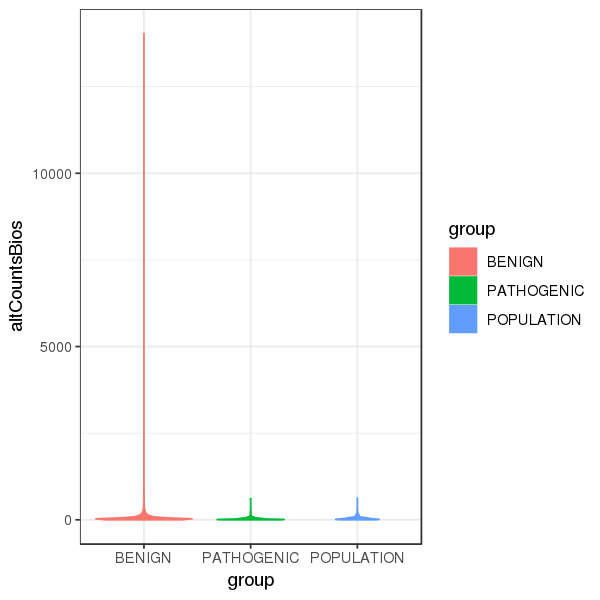

In [42]:
bxPlt <- ggplot(data=dfShort, aes(x=group, y=altCountsBios)) + theme_bw()
bxPlt <- bxPlt + geom_violin(aes(color=group, fill=group))
bxPlt

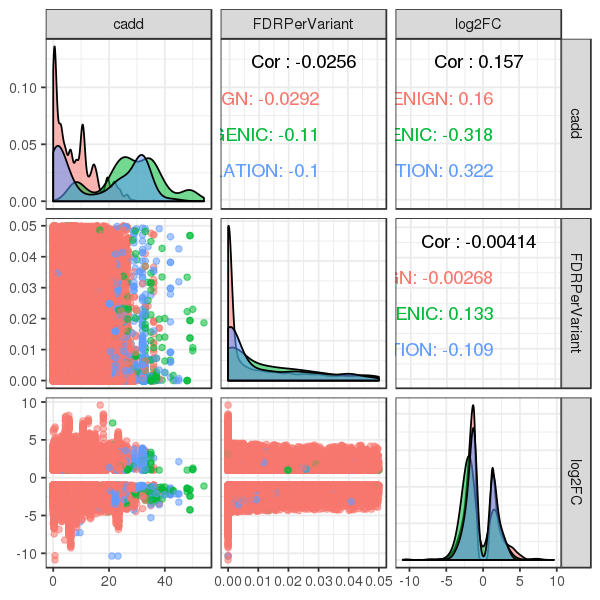

In [43]:
pm <- ggpairs(data=dfShort, aes(color=group, alpha=0.5), columns=c('cadd', 'FDRPerVariant', 'log2FC'))
pm <- pm + theme_bw()
pm

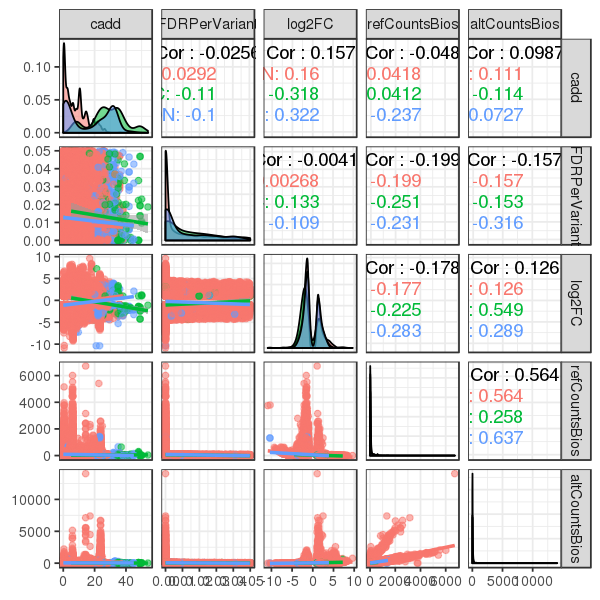

In [44]:
#
##
### XXX(zhzhang2015@sina.com): No correlation at all. 
##
#

pm <- ggpairs(
    data=dfShort, aes(color=group, alpha=0.5), 
    columns=c('cadd', 'FDRPerVariant', 'log2FC', 'refCountsBios', 'altCountsBios'),
    lower=list(continuous='smooth', combo='box')
)
pm <- pm + theme_bw()
pm

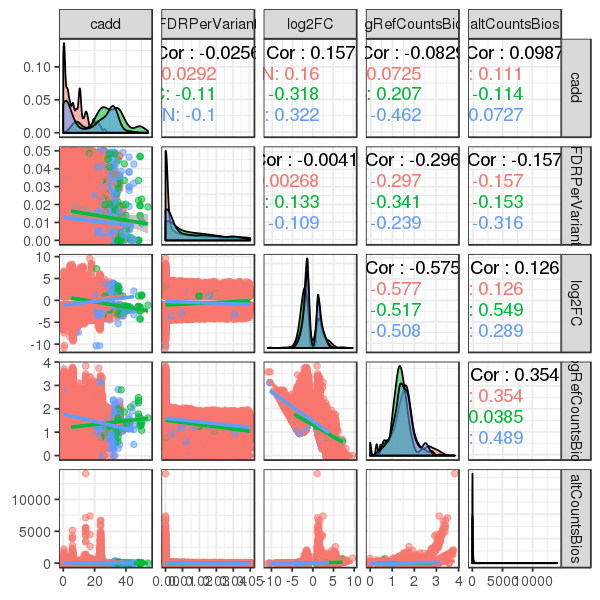

In [45]:
dfShort['logFDRPerVariant'] <- log10(dfShort['FDRPerVariant'])
dfShort['logcadd'] <- log10(dfShort['cadd'])
dfShort['logRefCountsBios'] <- log10(dfShort['refCountsBios'])

pm <- ggpairs(
    data=dfShort, aes(color=group, alpha=0.5), 
    columns=c('cadd', 'FDRPerVariant', 'log2FC', 'logRefCountsBios', 'altCountsBios'),
    lower=list(continuous='smooth', combo='box')
)
pm <- pm + theme_bw()
pm

Warning message:
“Removed 45 rows containing non-finite values (stat_density).”

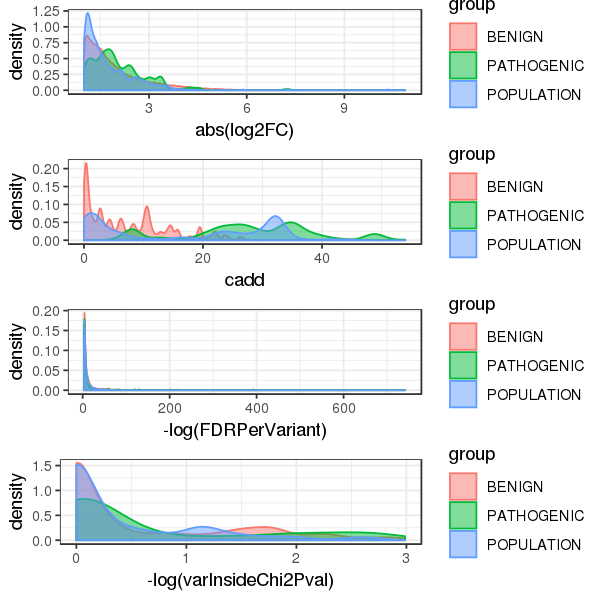

In [46]:
# dfPth <- dfShort[which(dfShort$group=='PATHOGENIC'), ]
# dfNoPth <- dfShort[which(dfShort$group=='BENIGN'), ]
p <- ggplot(data=dfShort, aes(color=group, fill=group)) + theme_bw()
p1 <- p + geom_density(aes(x=abs(log2FC)), alpha=0.5, adjust=1/2)# + lims(x=c(0, 6))
p2 <- p + geom_density(aes(x=cadd), alpha=0.5, adjust=1/2)
p3 <- p + geom_density(aes(x=-log(FDRPerVariant)), alpha=0.5, adjust=1/2)# + lims(x=c(0, 50))
p4 <- p + geom_density(data=dfShort[which(dfShort$varInsideChi2Pval>=0.05), ], aes(x=-log(varInsideChi2Pval)), alpha=0.5)# + lims(x=c(0, 50))
grid.arrange(p1, p2, p3, p4, ncol=1)

In [47]:
dfShortChiGt0.05 <- dfShort[which(df$varInsideChi2Pval>=0.05), ]

Warning message:
“Removed 71 rows containing non-finite values (stat_density).”

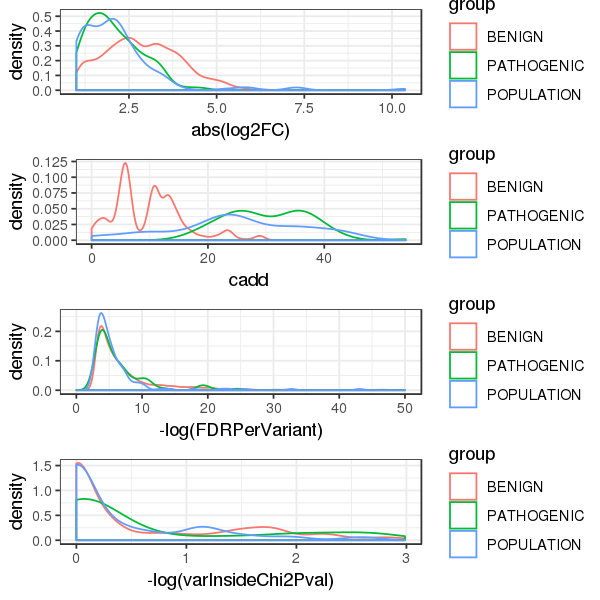

In [50]:
p <- ggplot(data=dfShortChiGt0.05, aes(color=group)) + theme_bw()
p1 <- p + geom_density(aes(x=abs(log2FC)), alpha=0.5)# + lims(x=c(0, 6))
p2 <- p + geom_density(aes(x=cadd), alpha=0.5)
p3 <- p + geom_density(aes(x=-log(FDRPerVariant)), alpha=0.5) + lims(x=c(0, 50))
p4 <- p + geom_density(aes(x=-log(varInsideChi2Pval)), alpha=0.5)# + lims(x=c(0, 50))
grid.arrange(p1, p2, p3, p4, ncol=1)

In [14]:
# Resampling
## Bootstrap
set.seed(1234)

dfBn <- df[which(df$group=='BENIGN'), ]
dfPth <- df[which(df$group=='PATHOGENIC'), ]
dfPop <- df[which(df$group=='POPULATION'), ]

idxBn <- rownames(dfBn)
idxPth <- rownames(dfPth)
idxPop <- rownames(dfPop)

# Means of log2FC
cat('Mean of log2FC in BENIGN: ', mean(dfBn[, 'log2FC']), '\n')
cat('Mean of log2FC in PATHOGENIC: ', mean(dfPth[, 'log2FC']), '\n')
cat('Mean of log2FC in POPULATION: ', mean(dfPop[, 'log2FC']), '\n')

# Record number
cat('NO of log2FC in BENIGN: ', length(dfBn[, 'log2FC']), '\n')
cat('NO of log2FC in PATHOGENIC: ', length(dfPth[, 'log2FC']), '\n')
cat('NO of log2FC in POPULATION: ', length(dfPop[, 'log2FC']), '\n')

# Last output @ 2018.10.28
# Mean of log2FC in BENIGN:  -0.4502873 
# Mean of log2FC in PATHOGENIC:  -0.8093107 
# Mean of log2FC in POPULATION:  -0.3804123 
# NO of log2FC in BENIGN:  64078 
# NO of log2FC in PATHOGENIC:  192 
# NO of log2FC in POPULATION:  1224 

Mean of log2FC in BENIGN:  -0.4502873 
Mean of log2FC in PATHOGENIC:  -0.8093107 
Mean of log2FC in POPULATION:  -0.3804123 
NO of log2FC in BENIGN:  64078 
NO of log2FC in PATHOGENIC:  192 
NO of log2FC in POPULATION:  1224 


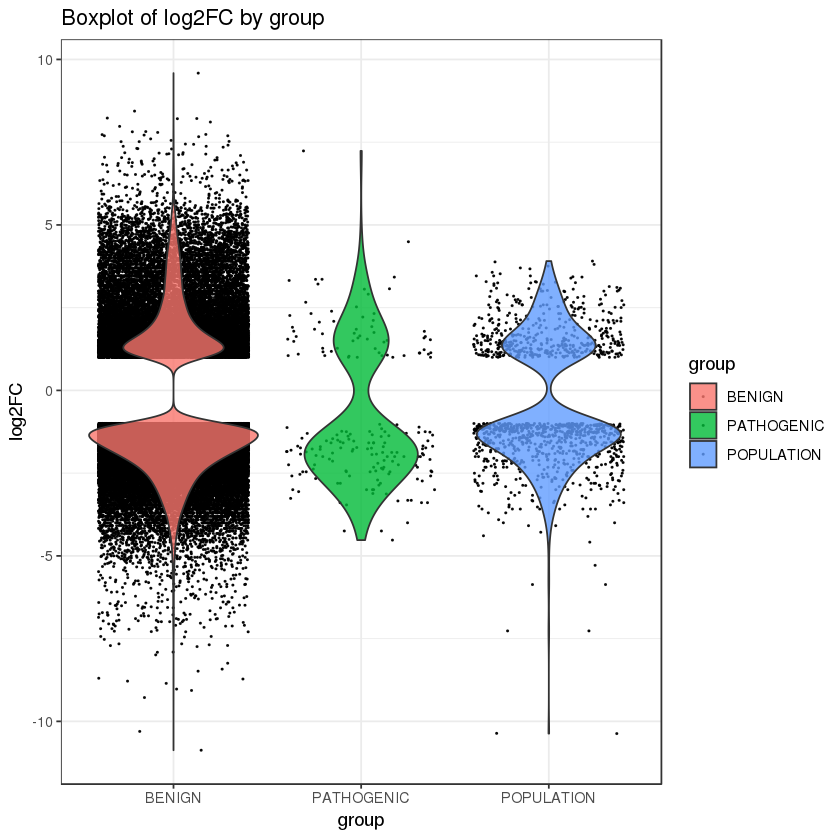

In [71]:
df  %>% 
    ggplot(aes(x=group, y=log2FC, fill=group)) + theme_bw() +
    geom_jitter(size=0.2, alpha=0.9) +
    geom_violin(alpha=0.8) + 
    labs(title='Boxplot of log2FC by group')

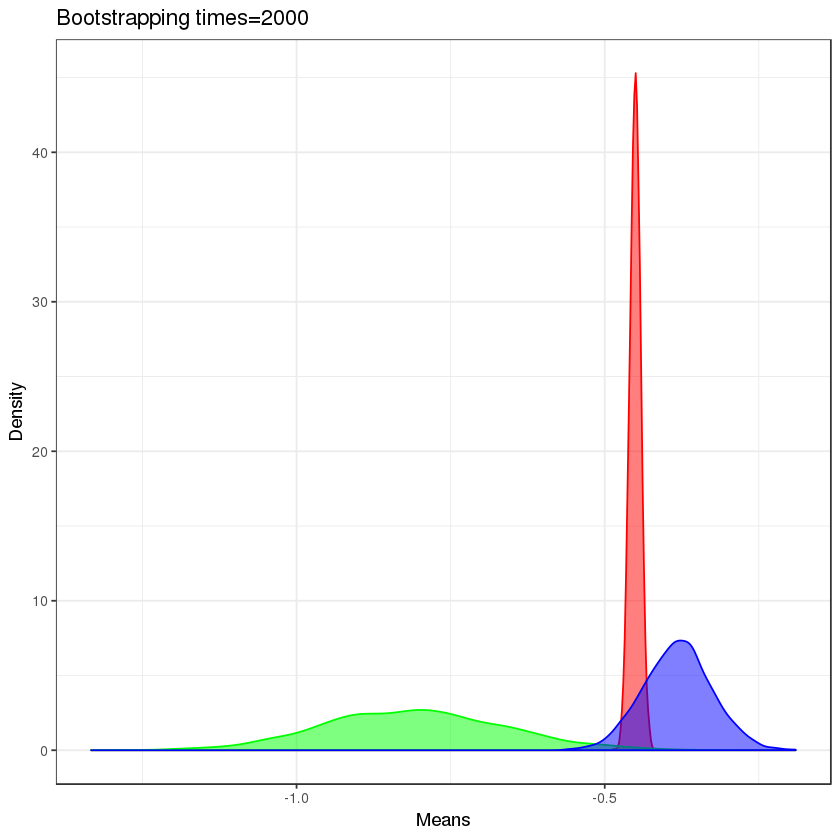

In [93]:
set.seed(1234)
data_frame(num = 1:2000) %>% 
    group_by(num) %>% 
    mutate(bnMeans=mean(dfBn[sample(idxBn, replace=TRUE), 'log2FC'])) %>% 
    mutate(pthMeans=mean(dfPth[sample(idxPth, replace=TRUE), 'log2FC'])) %>% 
    mutate(popMeans= mean(dfPop[sample(idxPop, replace=TRUE), 'log2FC'])) %>% 
    ggplot() + theme_bw() + 
    geom_density(aes(x=bnMeans), color='red', fill='red', alpha=0.5) + 
    geom_density(aes(x=pthMeans), color='green', fill='green', alpha=0.5) + 
    geom_density(aes(x=popMeans), color='blue', fill='blue', alpha=0.5) +
    labs(title='Bootstrapping times=2000', x='Means', y='Density')

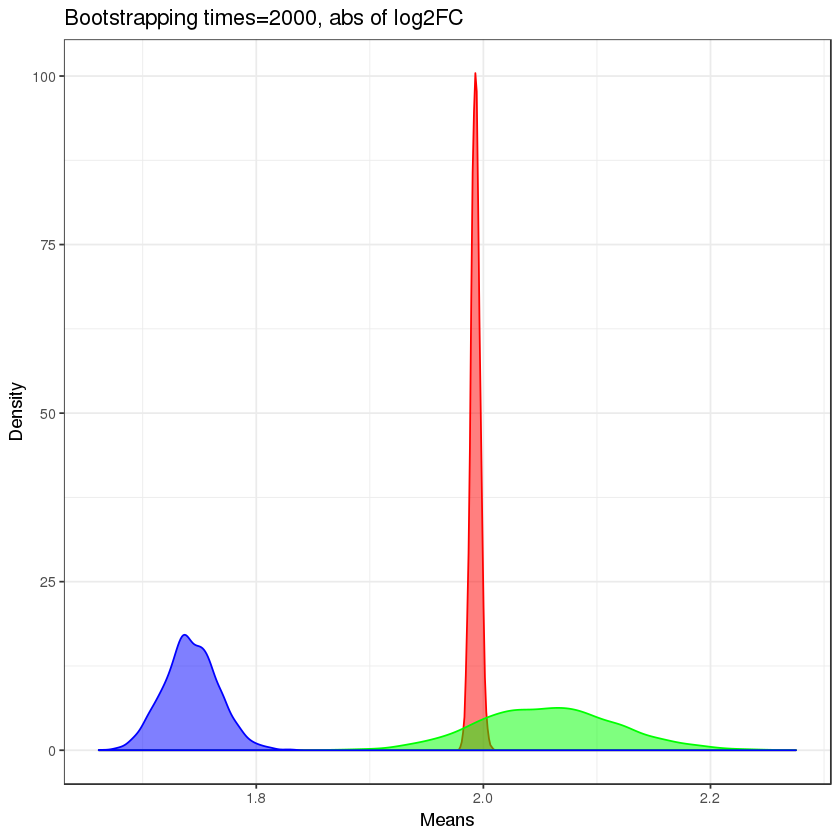

In [94]:
# Use the abs of log2FC
set.seed(1234)
data_frame(num = 1:2000) %>% 
    group_by(num) %>% 
    mutate(bnMeans=mean(abs(dfBn[sample(idxBn, replace=TRUE), 'log2FC']))) %>% 
    mutate(pthMeans=mean(abs(dfPth[sample(idxPth, replace=TRUE), 'log2FC']))) %>% 
    mutate(popMeans= mean(abs(dfPop[sample(idxPop, replace=TRUE), 'log2FC']))) %>% 
    ggplot() + theme_bw() + 
    geom_density(aes(x=bnMeans), color='red', fill='red', alpha=0.5) + 
    geom_density(aes(x=pthMeans), color='green', fill='green', alpha=0.5) + 
    geom_density(aes(x=popMeans), color='blue', fill='blue', alpha=0.5) +
    labs(title='Bootstrapping times=2000, abs of log2FC', x='Means', y='Density')

Warning message:
“Removed 3 rows containing non-finite values (stat_density).”

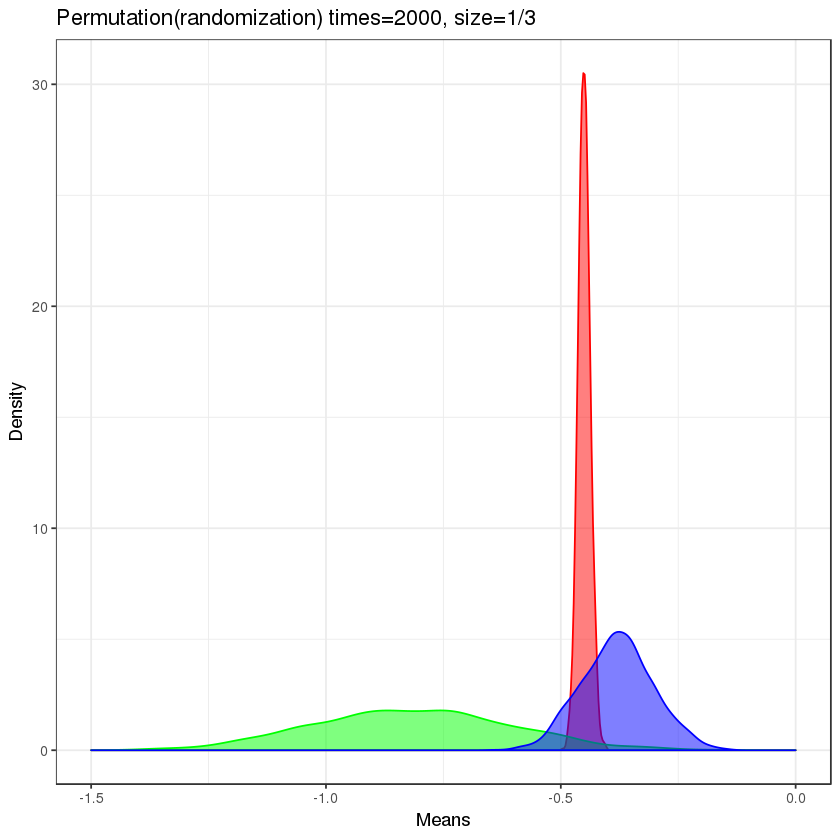

In [90]:
set.seed(1234)
data_frame(num = 1:2000) %>% 
    group_by(num) %>% 
    mutate(bnMeans=mean(dfBn[sample(idxBn, size=20000), 'log2FC'])) %>% 
    mutate(pthMeans=mean(dfPth[sample(idxPth, size=64), 'log2FC'])) %>% 
    mutate(popMeans= mean(dfPop[sample(idxPop, size=400), 'log2FC'])) %>% 
    ggplot() + theme_bw() + 
    geom_density(aes(x=bnMeans), color='red', fill='red', alpha=0.5) + 
    geom_density(aes(x=pthMeans), color='green', fill='green', alpha=0.5) + 
    geom_density(aes(x=popMeans), color='blue', fill='blue', alpha=0.5) + 
    lims(x=c(-1.5, 0)) +
    labs(title='Permutation(randomization) times=2000, size=1/3', x='Means', y='Density')

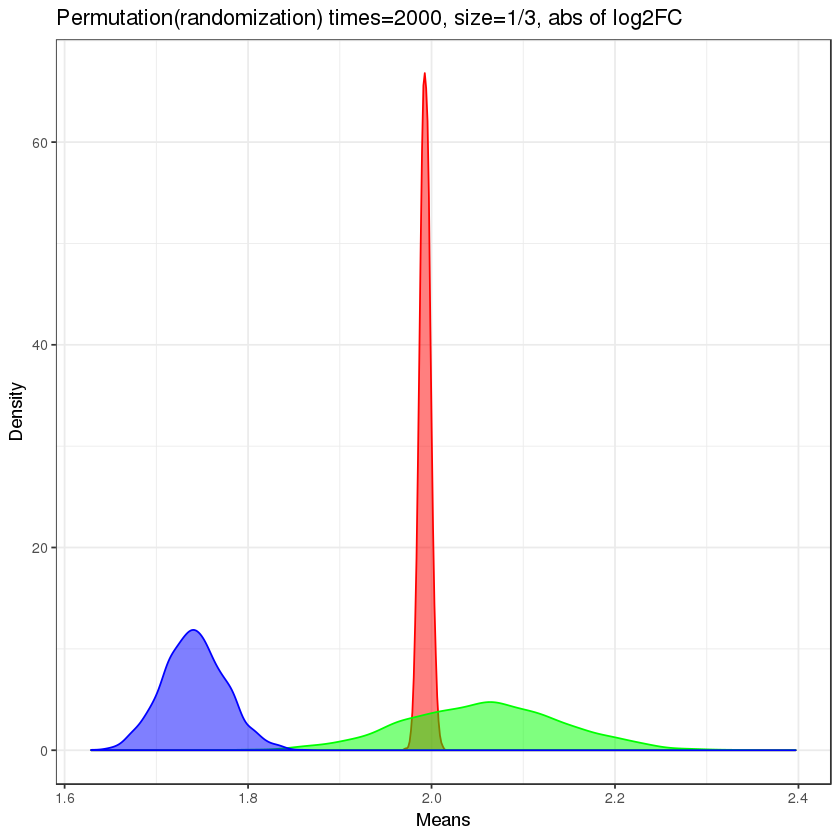

In [86]:
set.seed(1234)
data_frame(num = 1:2000) %>% 
    group_by(num) %>% 
    mutate(bnMeans=mean(abs(dfBn[sample(idxBn, size=20000), 'log2FC']))) %>% 
    mutate(pthMeans=mean(abs(dfPth[sample(idxPth, size=64), 'log2FC']))) %>% 
    mutate(popMeans= mean(abs(dfPop[sample(idxPop, size=400), 'log2FC']))) %>% 
    ggplot() + theme_bw() + 
    geom_density(aes(x=bnMeans), color='red', fill='red', alpha=0.5) + 
    geom_density(aes(x=pthMeans), color='green', fill='green', alpha=0.5) + 
    geom_density(aes(x=popMeans), color='blue', fill='blue', alpha=0.5) + 
    labs(title='Permutation(randomization) times=2000, size=1/3, abs of log2FC', x='Means', y='Density')

In [49]:
lg.info('=== Done ===')

2018-10-29,09:27:23 <IRkernel::main()> INFO: === Done ===
